Reading Standard calibration media extended

In [9]:
import pandas as pd

df = pd.read_excel('Standard calibration in culture media_extended.xlsx', sheet_name='Raw data', )
df.head()

,E0_Blank_culture media MH - moving average baseline,Unnamed: 1,Pyo 100 uM_MH - moving average baseline,Unnamed: 3,Unnamed: 4,Pyo 50 uM_MH - moving average baseline,Unnamed: 6,Unnamed: 7,Pyo 25 uM_MH - moving average baseline,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Pyo 0.25 uM_MH - moving average baseline,Unnamed: 35,Unnamed: 36,Pyo 0.1 uM_MH - moving average baseline,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,V,µA,µA,µA,µA,µA,µA,µA,µA,µA,...,µA,µA,µA,µA,µA,µA,µA,µA,µA,µA
1,-0.600097,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.595262,0.063593,0.098656,0.109374,0.115718,0.082966,0.110628,0.104234,0.088812,0.082304,...,0.079479,0.075286,0.075833,0.076125,0.079187,0.083927,0.078385,0.110979,0.051843,0.066755
3,-0.590427,0.054031,0.121318,0.130725,0.148006,0.099352,0.122679,0.113728,0.090737,0.073225,...,0.04127,0.070401,0.071166,0.054775,0.054862,0.065697,0.060739,0.079771,0.044581,0.064057
4,-0.585592,0.033967,0.136981,0.152074,0.173293,0.115738,0.113729,0.119721,0.085662,0.085147,...,0.038062,0.048015,0.045499,0.040424,0.044536,0.043967,0.064092,0.062562,0.030319,0.047358


Extracting the values:
- first column represents the voltage used for each voltammogram
- the rest of the columns represent the currents recorded by each voltammogram

In [42]:
concentrations = [
    0,
    100,
    100,
    100,
    50,
    50,
    50,
    25,
    25,
    25,
    15,
    15,
    15,
    10,
    10,
    10,
    7.5,
    7.5,
    7.5,
    5,
    5,
    5,
    2.5,
    2.5,
    1,
    1,
    1,
    0.5,
    0.5,
    0.5,
    0.5,
    0.5,
    0.5,
    0.25,
    0.25,
    0.25,
    0.1,
    0.1,
    0.1,
    0.1,
    0.1
]
voltage = df.iloc[1:, 0].values
currents = []

for col in df.columns[1:]:
    currents.append(df[col].values[1:])
    # Process voltage and current as needed


plotting each voltammogram

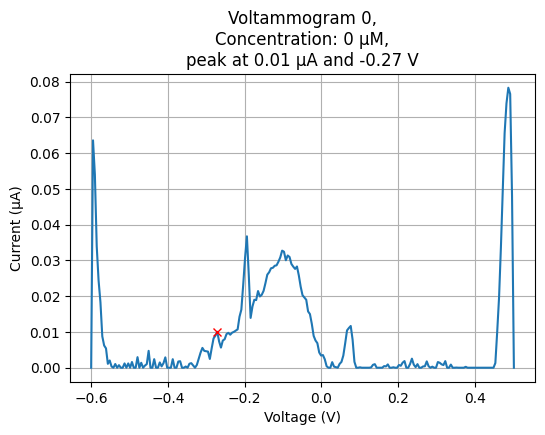

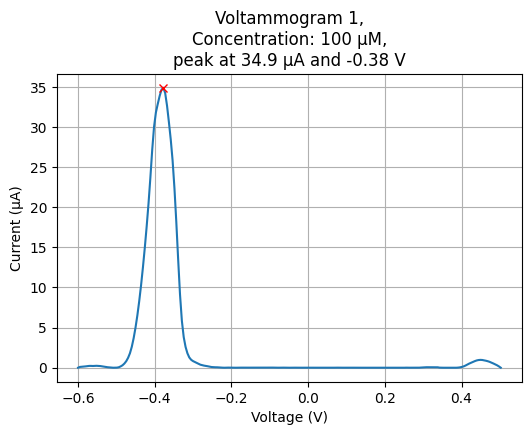

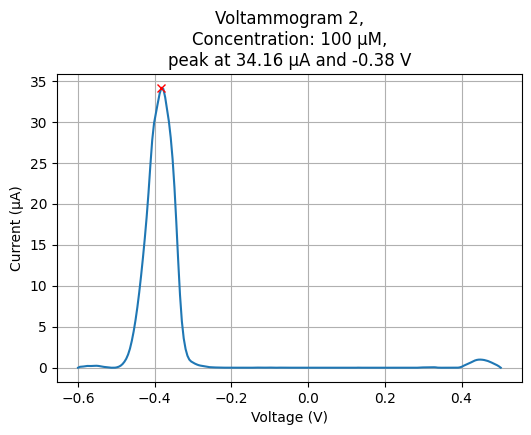

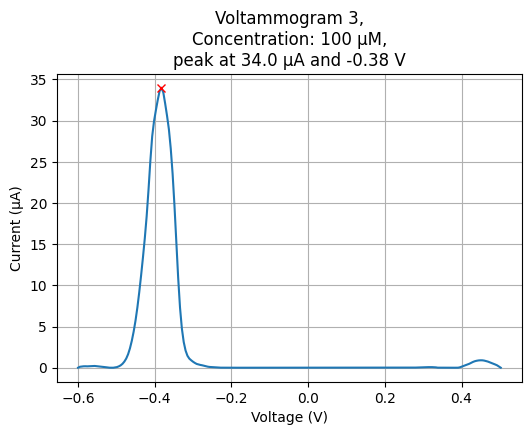

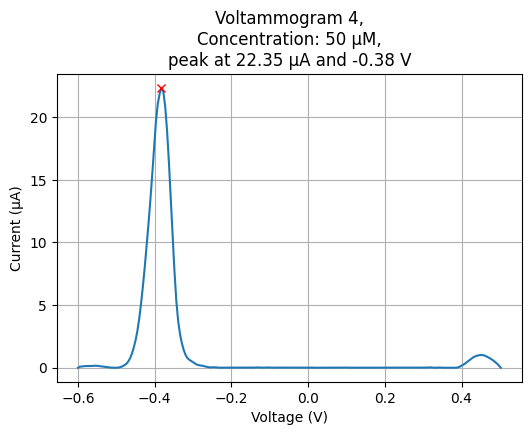

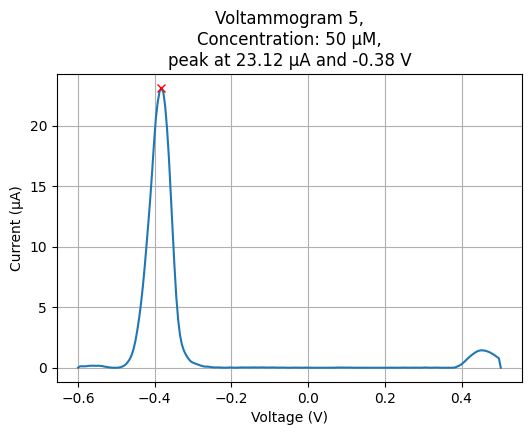

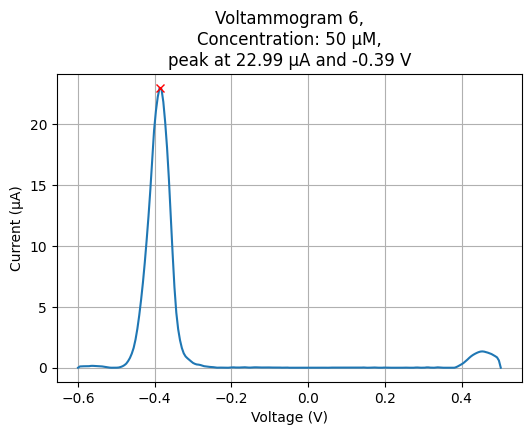

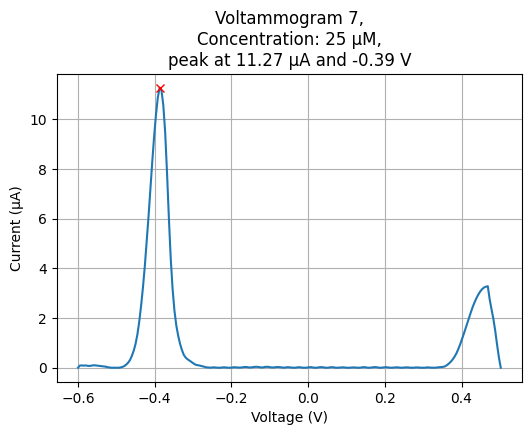

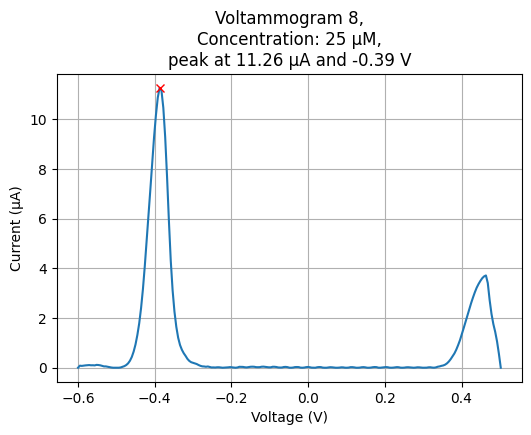

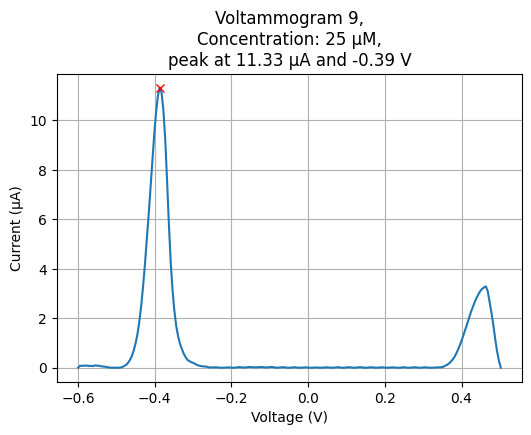

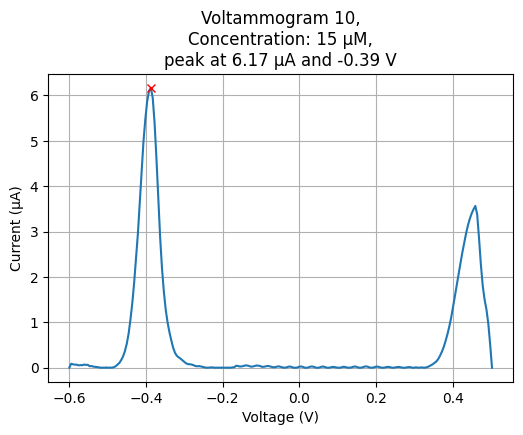

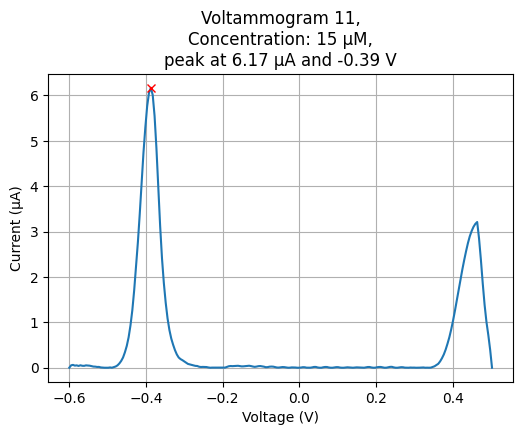

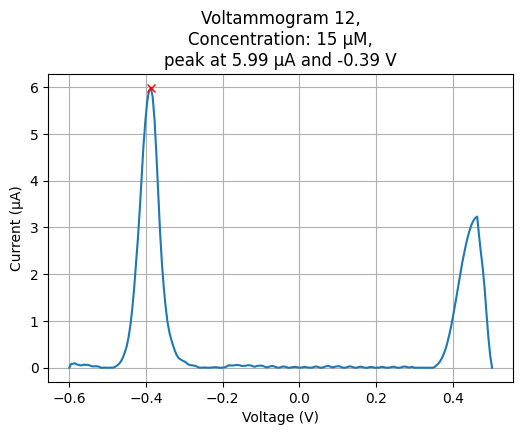

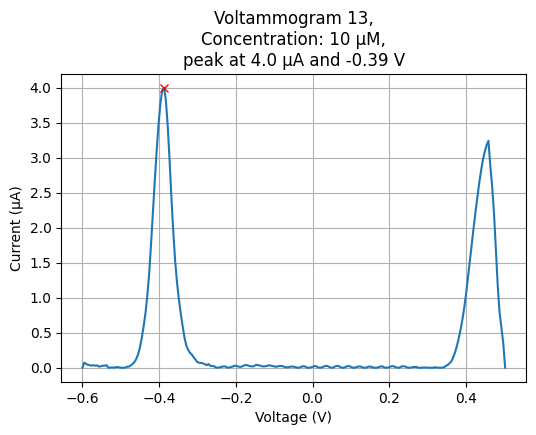

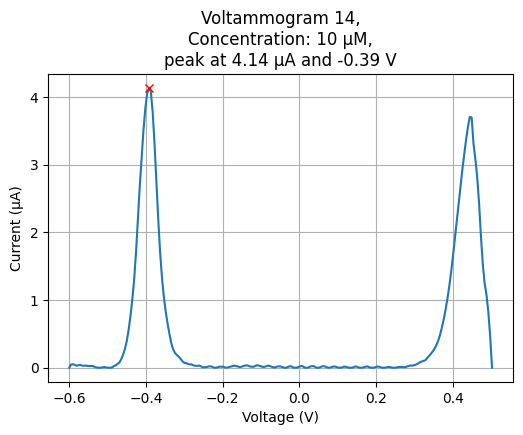

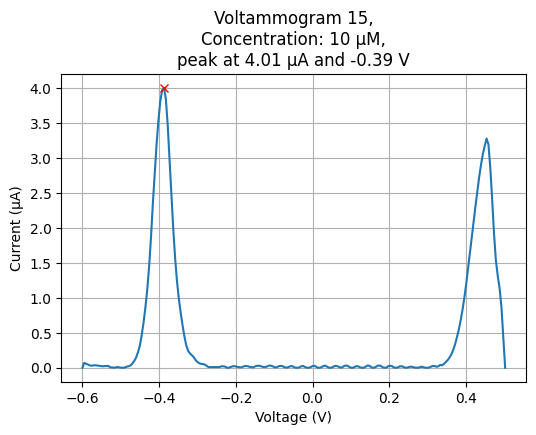

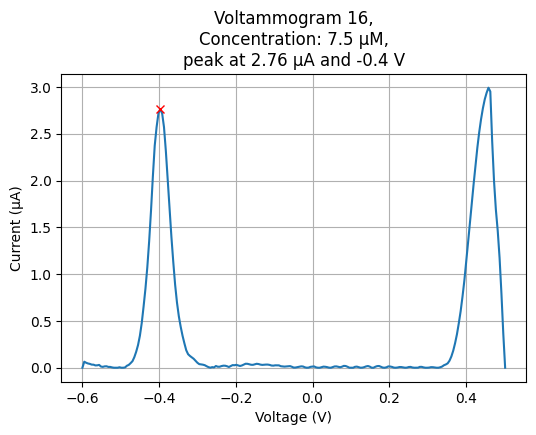

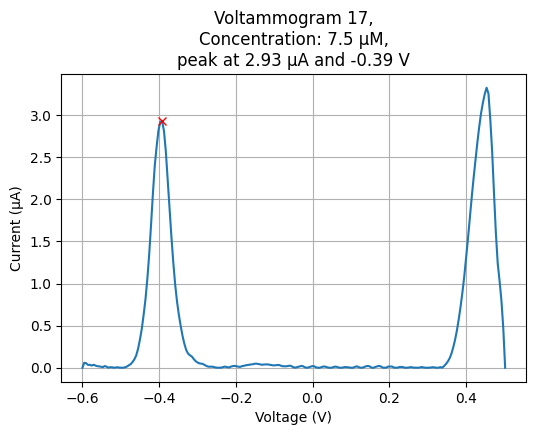

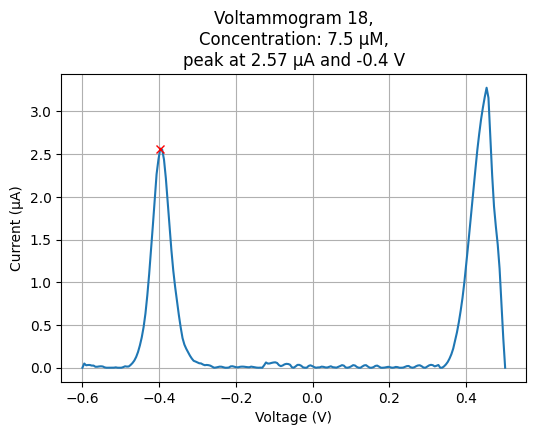

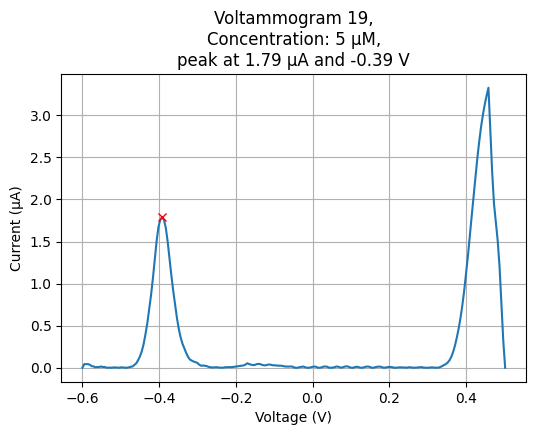

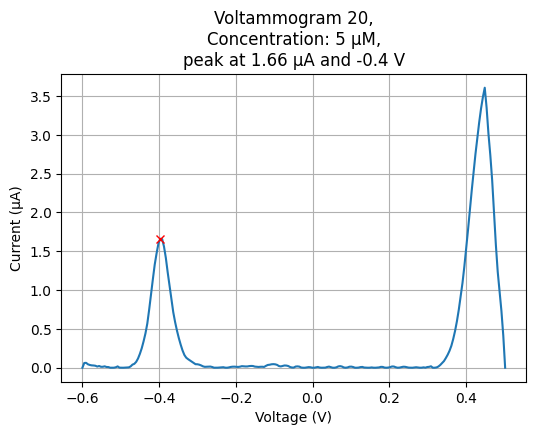

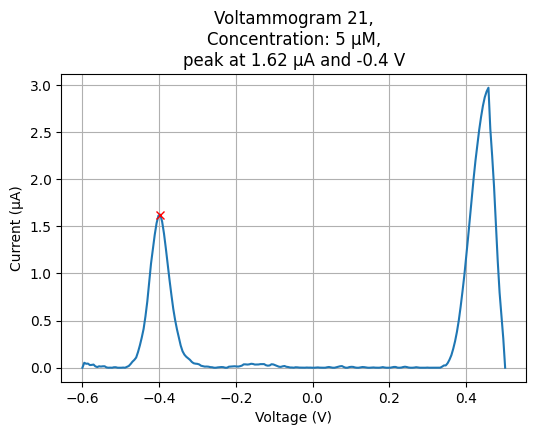

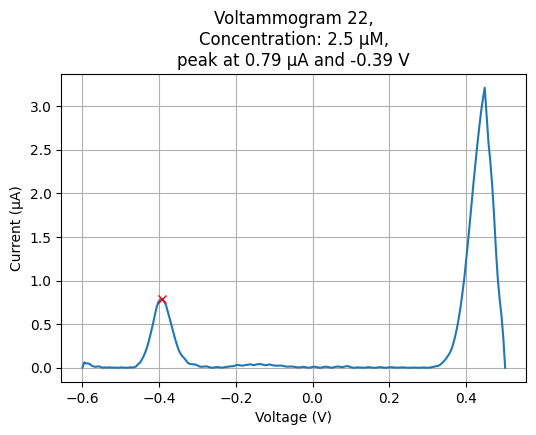

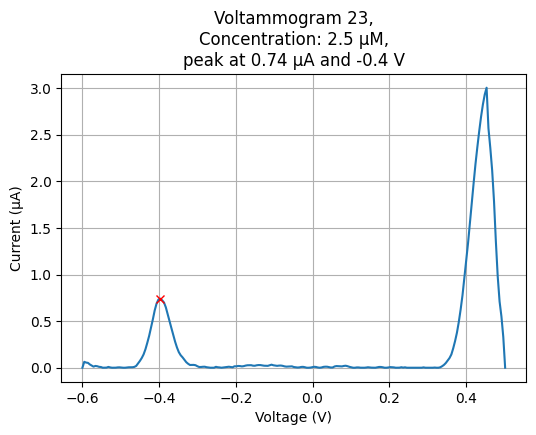

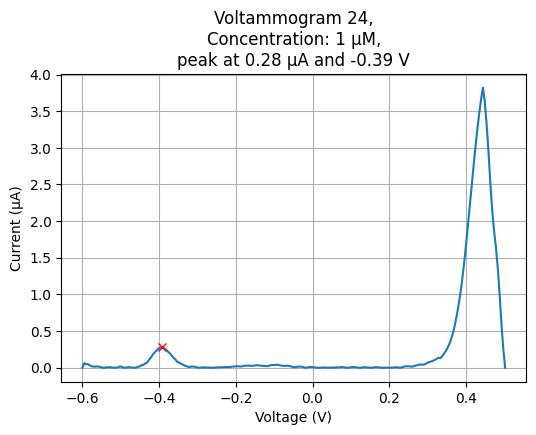

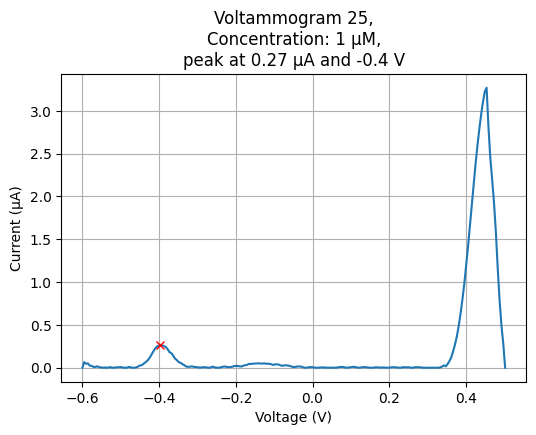

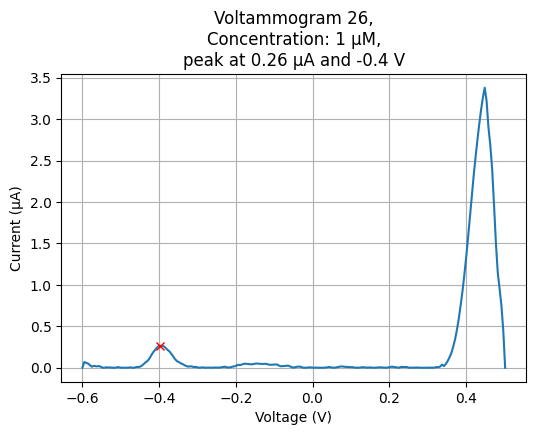

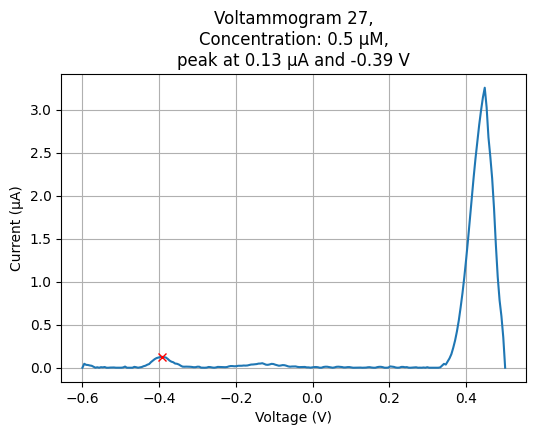

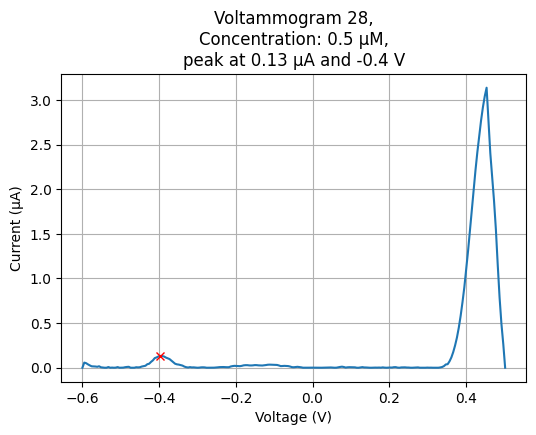

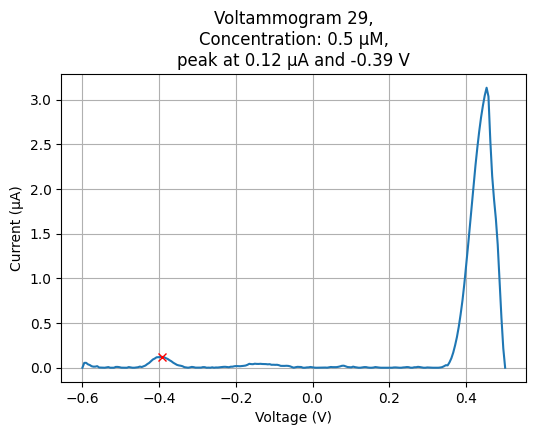

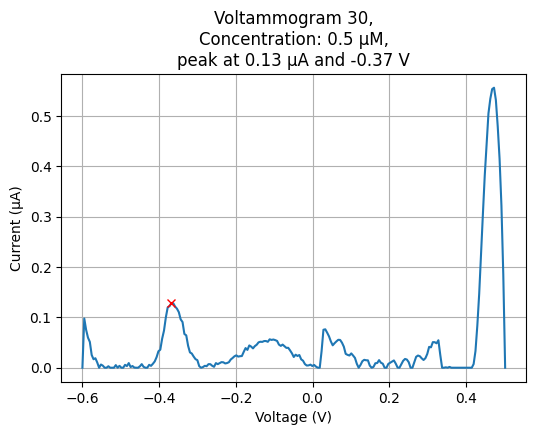

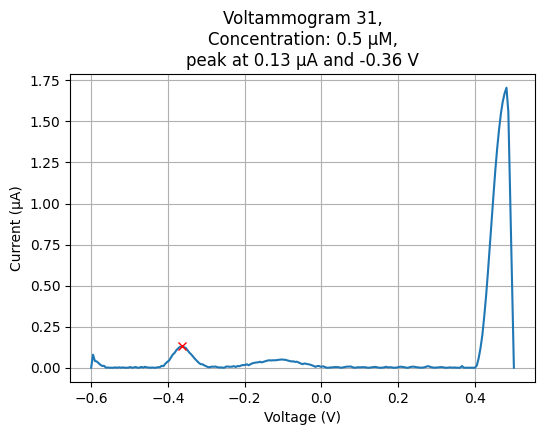

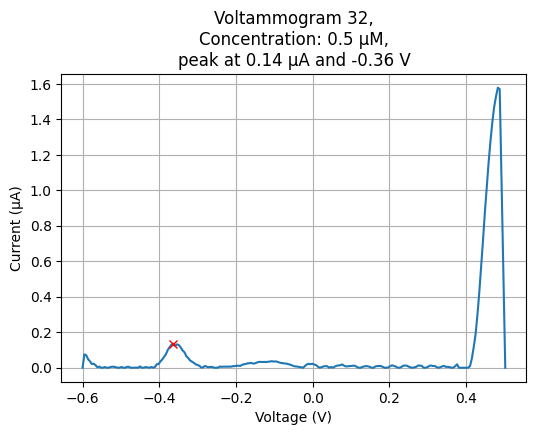

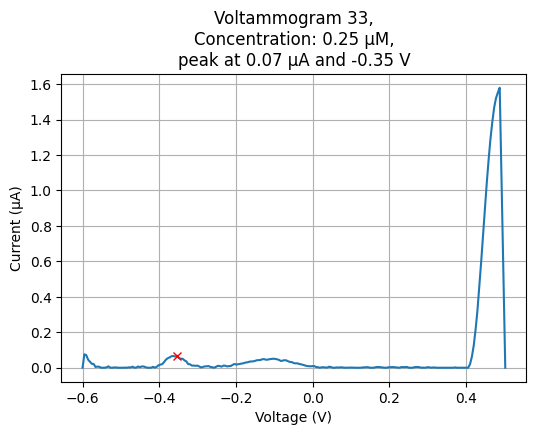

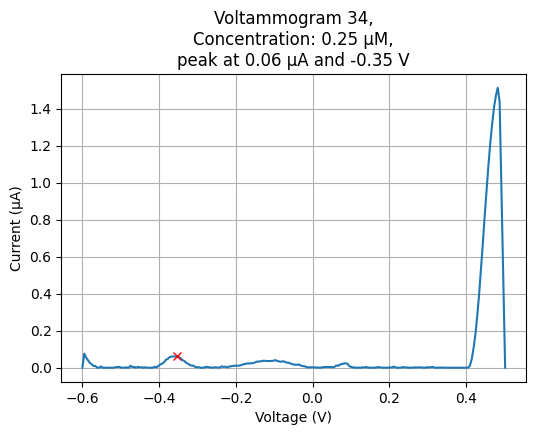

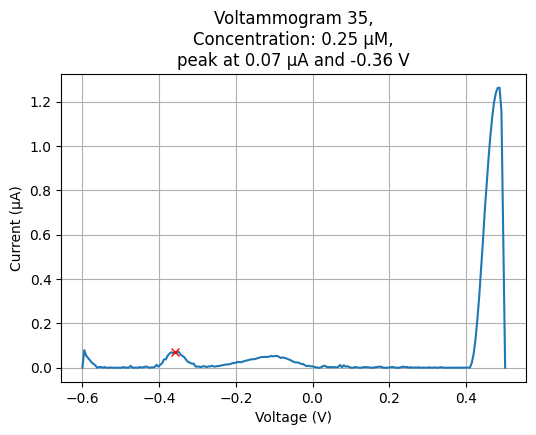

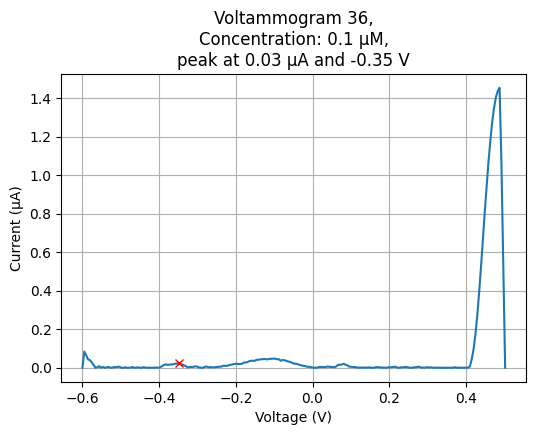

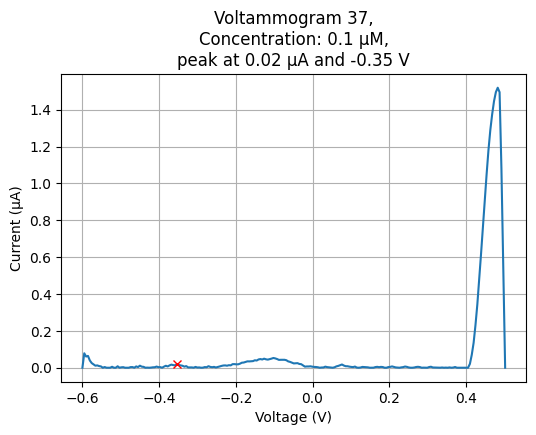

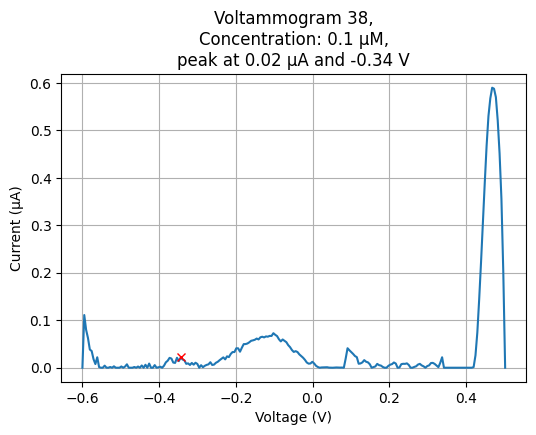

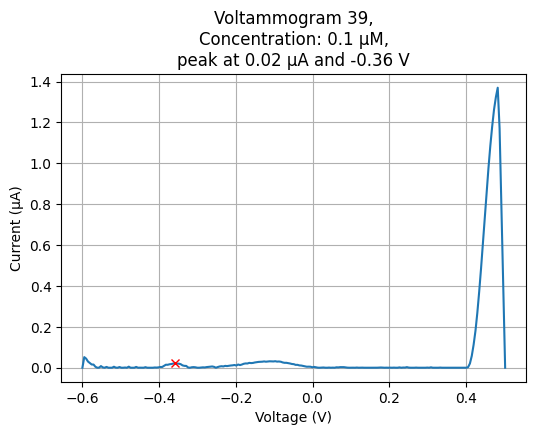

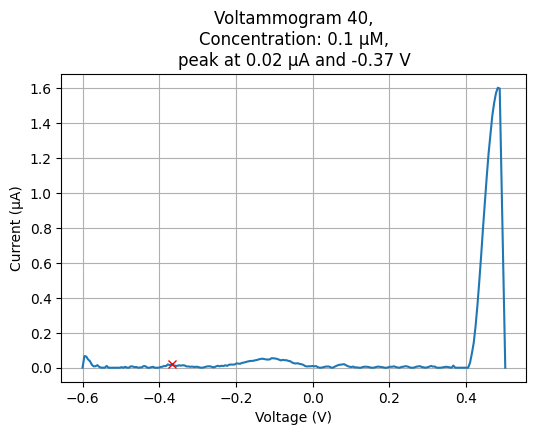

In [56]:
from matplotlib import pyplot as plt
import os

path = 'voltammograms'
if not os.path.exists(path):
    os.makedirs(path)

for i, current in enumerate(currents):
    peak = max(current[18:70])
    peak_voltage = voltage[list(current).index(peak)]
# create a new figure for each plot and close it after saving
    plt.figure(figsize=(6, 4))
    plt.plot(voltage, current)
    plt.plot(peak_voltage, peak, 'rx')
    plt.grid()
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current (µA)')
    plt.title(f'Voltammogram {i},\nConcentration: {concentrations[i]} µM,\npeak at {round(peak, 2)} µA and {round(peak_voltage, 2)} V')
    fname = f'voltammograms/voltammogram_{i:02d}.jpg'
    plt.savefig(fname, bbox_inches='tight', dpi=200)
    plt.show()
    plt.close()
